 #Election Data - Polls and Donors
 In this data project we will be looking at data from the 2012 presidential election.
 First dataset will be the results of aggregated political poll data.
 Second dataset will be the donor data for candidates.
- Who was being polled and what was their party affiliation?
- Did the poll results favor Romney or Obama?
- How did undecided voters affect the polls?
- Can we account for the undecided voters?
- How did voter sentiment change over time?
- Can we see an affect in the polls from the debates?

In [1]:
# Standard imports
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import plotly
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
import seaborn as sns
sns.set_style('whitegrid')
init_notebook_mode(connected=True)


In [2]:
# The data for the poll will be obtained from HuffPost Pollster.

# Grab data from web
import requests
# Work with csv file
from io import StringIO

URL = 'https://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv'

# Using request to get information in text form.
source = requests.get(URL).text 

# Use StringIO to avoid IO error with pandas.
poll_data = StringIO(source)


In [3]:
# Creating the dataframe
data_df = pd.read_csv(poll_data)


In [4]:
# Lets see what it looks like.
data_df.head()


,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


In [5]:
# Lets see df info.
data_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 17 columns):
Pollster                  586 non-null object
Start Date                586 non-null object
End Date                  586 non-null object
Entry Date/Time (ET)      586 non-null object
Number of Observations    564 non-null float64
Population                586 non-null object
Mode                      586 non-null object
Obama                     586 non-null float64
Romney                    586 non-null float64
Undecided                 423 non-null float64
Other                     202 non-null float64
Pollster URL              586 non-null object
Source URL                584 non-null object
Partisan                  586 non-null object
Affiliation               586 non-null object
Question Text             0 non-null float64
Question Iteration        586 non-null int64
dtypes: float64(6), int64(1), object(10)
memory usage: 77.9+ KB


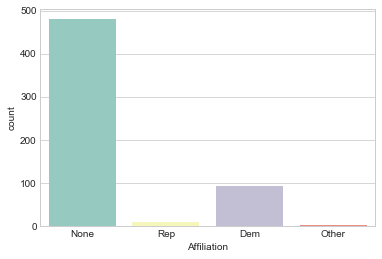

In [6]:
# We see that most pollster's are non-affiliate, but are still somewhat dem leaning.
sns.countplot('Affiliation', data=data_df)


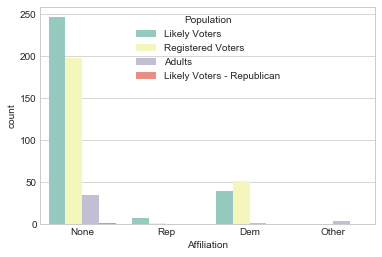

In [7]:
# Strong show of likely and registered voters
sns.countplot('Affiliation', data=data_df, hue='Population')


In [8]:
# Get voter averages
avg = pd.DataFrame(data_df.mean())
# Drop irrelevant columns
avg.drop(['Number of Observations', 'Question Text', 'Question Iteration'], axis=0, inplace=True)


In [9]:
# Get voter standard dev.
std = pd.DataFrame(data_df.std())
# Drop irrelevant columns
std.drop(['Number of Observations', 'Question Text', 'Question Iteration'], axis=0, inplace=True)


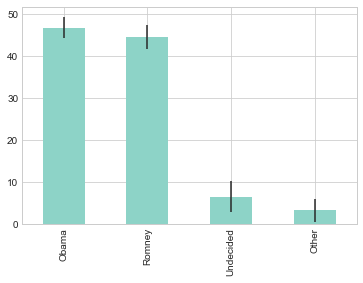

In [10]:
# Average sentiment of all polls
avg.plot(yerr=std, kind='bar', legend=False)


In [11]:
# Here we concatenate both avg and std datafames
poll_avg = pd.concat([avg, std], axis=1)
poll_avg.columns = ['Avg', 'Std']
poll_avg


,Avg,Std
Obama,46.805461,2.422058
Romney,44.614334,2.906180
Undecided,6.550827,3.701754
Other,3.376238,2.692726


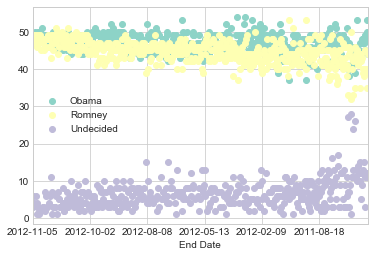

In [12]:
# Timeseries
data_df.plot(x='End Date', y=['Obama', 'Romney', 'Undecided'], linestyle='', marker='o')


In [13]:
from datetime import datetime

# Here we find the difference in poll numbers. A positive percentage favors Obama,
# while a negative percentage favors Romney.
data_df['Difference'] = (data_df['Obama'] - data_df['Romney']) / 100

data_df.head()


,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration,Difference
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1,0.00
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1,0.02
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1,0.00
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1,0.01
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1,-0.01


In [14]:
# Take mean of grouped (start date) polls.
data_df = data_df.groupby(['Start Date'], as_index=False).mean()
data_df.head()


,Start Date,Number of Observations,Obama,Romney,Undecided,Other,Question Text,Question Iteration,Difference
0,2009-03-13,1403.0,44.0,44.0,12.0,NaN,NaN,1,0.00
1,2009-04-17,686.0,50.0,39.0,11.0,NaN,NaN,1,0.11
2,2009-05-14,1000.0,53.0,35.0,12.0,NaN,NaN,1,0.18
3,2009-06-12,638.0,48.0,40.0,12.0,NaN,NaN,1,0.08
4,2009-07-15,577.0,49.0,40.0,11.0,NaN,NaN,1,0.09


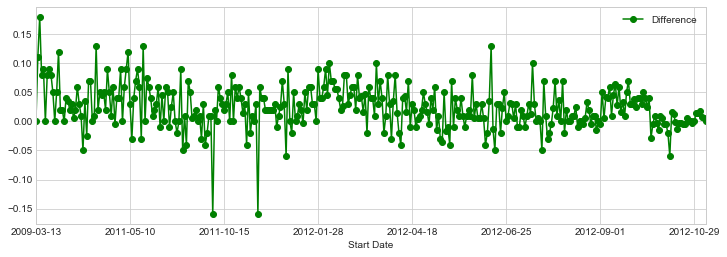

In [15]:
'''
Looks like Obama was leading in many of the polls through the election season. Romney received two
big spikes between late 2011 and early 2012. 
'''
# Time series of poll differences.
data_df.plot(x='Start Date', y='Difference', figsize=(12,4), marker='o', linestyle='-', color='green')


In [16]:
# Find row indexes of Start Date in October.
row_in = 0
xlimit = []

for date in data_df['Start Date']:
    if date[0:7] == '2012-10':
        xlimit.append(row_in)
        row_in += 1
    else:
        row_in += 1

print(f'Min: {min(xlimit)}', f'Max: {max(xlimit)}' )


Min: 325 Max: 352


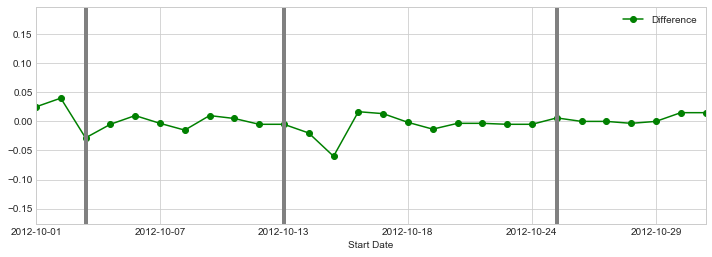

In [17]:
# Time series of poll differences in the month of October.
data_df.plot(x='Start Date', y='Difference', figsize=(12,4), marker='o', linestyle='-', color='green', xlim=(325, 352))
# Debate on Oct. 3rd.
plt.axvline(x=325+2, linewidth=4, color='grey')
# Debate on Oct. 11th.
plt.axvline(x=325+10, linewidth=4, color='grey')
# Debate on Oct. 22nd.
plt.axvline(x=325+21, linewidth=4, color='grey')





- How much was donated and what was the average donation?
- How did the donations differ between candidates?
- How did the donations differ betwen Democrats and Republicans?
- What are the demographics of the donors?
- Is there a pattern in donation amounts?

In [18]:
donor_df = pd.read_csv('./data/Election_Donor_Data.csv')


/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning:

Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.



In [19]:
# Lets see what it looks like.
donor_df.head()


,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


In [20]:
# Lets see df info.
donor_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
cmte_id              1001731 non-null object
cand_id              1001731 non-null object
cand_nm              1001731 non-null object
contbr_nm            1001731 non-null object
contbr_city          1001712 non-null object
contbr_st            1001727 non-null object
contbr_zip           1001620 non-null object
contbr_employer      988002 non-null object
contbr_occupation    993301 non-null object
contb_receipt_amt    1001731 non-null float64
contb_receipt_dt     1001731 non-null object
receipt_desc         14166 non-null object
memo_cd              92482 non-null object
memo_text            97770 non-null object
form_tp              1001731 non-null object
file_num             1001731 non-null int64
dtypes: float64(1), int64(1), object(14)
memory usage: 122.3+ MB


In [21]:
# Most common donation amounts
donor_df['contb_receipt_amt'].value_counts()


 100.00     178188
 50.00      137584
 25.00      110345
 250.00      91182
 500.00      57984
 2500.00     49005
 35.00       37237
 1000.00     36494
 10.00       33986
 200.00      27813
 20.00       17565
 15.00       16163
 150.00      14600
 75.00       13647
 201.20      11718
 30.00       11381
 300.00      11204
 20.12        9897
 5.00         9024
 40.00        5007
 2000.00      4128
 55.00        3760
 1500.00      3705
 3.00         3383
 60.00        3084
 400.00       3066
-2500.00      2727
 110.00       2554
 125.00       2520
 19.00        2474
             ...  
 174.80          1
 7.27            1
 1219.00         1
 1884.88         1
 162.25          1
 218.31          1
 78.62           1
 203.16          1
 53.11           1
 499.66          1
 19.53           1
 188.60          1
 47.10           1
 19.85           1
 28.83           1
 202.59          1
-5500.00         1
 9.25            1
 202.66          1
 1205.00         1
 80.73           1
 115.07     

In [22]:
# Average donation amount
donation_mean = donor_df['contb_receipt_amt'].mean()
print(f'Average donation to candidates was ${donation_mean:0.2f}.')

# Standard deviation of donations
donation_std = donor_df['contb_receipt_amt'].std()
print(f'Standard deviation of donations to candidates was ${donation_std:0.2f}.')


Average donation to candidates was $298.24.
Standard deviation of donations to candidates was $3749.67.


In [23]:
top_donor = donor_df['contb_receipt_amt'].copy()
top_donor.sort_values()


114604     -30800.00
226986     -25800.00
101356      -7500.00
398429      -5500.00
250737      -5455.00
33821       -5414.31
908565      -5115.00
456649      -5000.00
574657      -5000.00
30513       -5000.00
562267      -5000.00
30584       -5000.00
86268       -5000.00
708920      -5000.00
665887      -5000.00
708899      -5000.00
708929      -5000.00
21172       -5000.00
21168       -5000.00
21167       -5000.00
262328      -5000.00
946875      -5000.00
7361        -5000.00
416403      -5000.00
21164       -5000.00
707945      -5000.00
615101      -5000.00
7973        -5000.00
54430       -5000.00
54434       -5000.00
             ...    
708022      10000.00
708898      10000.00
710177      10000.00
876244      10000.00
709608      10000.00
708919      10000.00
709739      10000.00
91145       10000.00
708138      10000.00
993178      10000.00
709813      10000.00
710730      10000.00
708928      10000.00
709268      10000.00
99829       10000.00
90076       10000.00
709859      1

In [24]:
# FCC records refund amounts in contb_receipt_amt.
# We will drop all refund amount and see how the std is affected.

top_donor = top_donor[top_donor > 0].sort_values()
top_donor.value_counts().head(10)


100.0     178188
50.0      137584
25.0      110345
250.0      91182
500.0      57984
2500.0     49005
35.0       37237
1000.0     36494
10.0       33986
200.0      27813
Name: contb_receipt_amt, dtype: int64

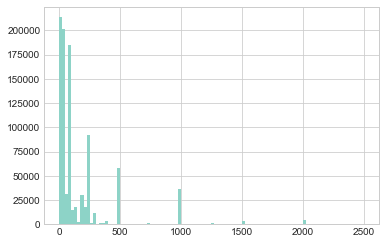

In [25]:
# Create a histogram to view peak donation amounts.

common_don = top_donor[top_donor < 2500]
common_don.hist(bins=100)


In [26]:
# List all candidates
candidates = donor_df['cand_nm'].unique()
candidates


array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [27]:
party_dict = {
    'Bachmann, Michelle' : 'Republican',
    'Cain, Herman' : 'Republican',
    'Gingrich, Newt' : 'Republican',
    'Huntsman, Jon' : 'Republican',
    'Johnson, Gary Earl' : 'Republican',
    'McCotter, Thaddeus G' : 'Republican',
    'Obama, Barack' : 'Democrat',
    'Paul, Ron' : 'Republican',
    'Pawlenty, Timothy' : 'Republican',
    'Perry, Rick' : 'Republican',
    "Roemer, Charles E. 'Buddy' III" : 'Republican',
    'Romney, Mitt' : 'Republican',
    'Santorum, Rick' : 'Republican',
}

donor_df['party'] = donor_df.cand_nm.map(party_dict)



In [28]:
donor_df = donor_df[donor_df.contb_receipt_amt > 0]
donor_df.head()


,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


In [29]:

def plot_bar(df, xaxis_title, yaxis_title, chart_title):

    color_dict_cand = {
    'Bachmann, Michelle' : 'crimson',
    'Cain, Herman' : 'crimson',
    'Gingrich, Newt' : 'crimson',
    'Huntsman, Jon' : 'crimson',
    'Johnson, Gary Earl' : 'crimson',
    'McCotter, Thaddeus G' : 'crimson',
    'Obama, Barack' : 'Blue',
    'Paul, Ron' : 'crimson',
    'Pawlenty, Timothy' : 'crimson',
    'Perry, Rick' : 'crimson',
    "Roemer, Charles E. 'Buddy' III" : 'crimson',
    'Romney, Mitt' : 'crimson',
    'Santorum, Rick' : 'crimson',
    }

    color_dict_party = {
    'Republican' : 'crimson',
    'Democrat' : 'blue',
    }

    if len(df.index) > 2:
        color = df.index.map(color_dict_cand)
    else:
        color = df.index.map(color_dict_party)

    trace = go.Bar(x=df.index, y=df, marker_color=color)
    layout = go.Layout(title=chart_title, 
                        xaxis={'title':xaxis_title},
                        yaxis={'title':yaxis_title})

    fig = go.Figure(data=[trace], layout=layout)
    iplot(fig, filename=f'{df}')


In [30]:
# Count number of donations to each candidate
donor_df.groupby(['cand_nm'])['contb_receipt_amt'].count().sort_values(ascending=False)
candidate_donation_count = donor_df.groupby(['cand_nm'])['contb_receipt_amt'].count().sort_values(ascending=False)
i = 0
for count in candidate_donation_count:
    print(f'The candidate {candidate_donation_count.index[i]} received {count:.0f} total donations.')
    print()
    i += 1


xaxis = 'Candidates'
yaxis = 'Donation Count'
title = 'Candidate Donation count'
plot_bar(candidate_donation_count, xaxis, yaxis, title)


The candidate Obama, Barack received 589127 total donations.

The candidate Paul, Ron received 143161 total donations.

The candidate Romney, Mitt received 105155 total donations.

The candidate Gingrich, Newt received 46883 total donations.

The candidate Santorum, Rick received 46245 total donations.

The candidate Cain, Herman received 20052 total donations.

The candidate Bachmann, Michelle received 13082 total donations.

The candidate Perry, Rick received 12709 total donations.

The candidate Roemer, Charles E. 'Buddy' III received 5844 total donations.

The candidate Huntsman, Jon received 4066 total donations.

The candidate Pawlenty, Timothy received 3844 total donations.

The candidate Johnson, Gary Earl received 1234 total donations.

The candidate McCotter, Thaddeus G received 73 total donations.



In [31]:
# Count number of donations to party
donor_df.groupby(['party'])['contb_receipt_amt'].count().sort_values(ascending=False)
party_donation_count = donor_df.groupby(['party'])['contb_receipt_amt'].count().sort_values(ascending=False)
i = 0
for count in party_donation_count:
    print(f'The {party_donation_count.index[i]} party received {count:.0f} total donations.')
    print()
    i += 1

xaxis = 'Party'
yaxis = 'Donation Count'
title = 'Party Donation count'
plot_bar(party_donation_count, xaxis, yaxis, title)


The Democrat party received 589127 total donations.

The Republican party received 402348 total donations.



In [32]:
# Total donated to each candidate
donor_df.groupby(['cand_nm'])['contb_receipt_amt'].sum().sort_values(ascending=False)
candidate_donations = donor_df.groupby(['cand_nm'])['contb_receipt_amt'].sum().sort_values(ascending=False)
i = 0
for donation in candidate_donations:
    print(f'The candidate {candidate_donations.index[i]} raised a total of ${donation:.0f}.')
    print()
    i += 1

xaxis = 'Candidates'
yaxis = 'Donation Amount'
title = 'Candidate Donation Amounts'
plot_bar(candidate_donations, xaxis, yaxis, title)


The candidate Obama, Barack raised a total of $135877427.

The candidate Romney, Mitt raised a total of $88335908.

The candidate Paul, Ron raised a total of $21009620.

The candidate Perry, Rick raised a total of $20305754.

The candidate Gingrich, Newt raised a total of $12832770.

The candidate Santorum, Rick raised a total of $11043159.

The candidate Cain, Herman raised a total of $7101082.

The candidate Pawlenty, Timothy raised a total of $6004819.

The candidate Huntsman, Jon raised a total of $3330373.

The candidate Bachmann, Michelle raised a total of $2711439.

The candidate Johnson, Gary Earl raised a total of $566962.

The candidate Roemer, Charles E. 'Buddy' III raised a total of $373010.

The candidate McCotter, Thaddeus G raised a total of $39030.



In [33]:
# Total donated to party
donor_df.groupby(['party'])['contb_receipt_amt'].sum().sort_values(ascending=False)
candidate_party_donations = donor_df.groupby(['party'])['contb_receipt_amt'].sum().sort_values(ascending=False)
i = 0
for donation in candidate_party_donations:
    print(f'The {candidate_party_donations.index[i]} party raised a total of ${donation:.0f}.')
    print()
    i += 1

xaxis = 'Party'
yaxis = 'Donation Amount'
title = 'Party Donation Amounts'
plot_bar(candidate_party_donations, xaxis, yaxis, title)


The Republican party raised a total of $173653926.

The Democrat party raised a total of $135877427.



In [34]:
# Average donated to each candidate
donor_df.groupby(['cand_nm'])['contb_receipt_amt'].mean().sort_values(ascending=False)

candidate_avg_donations = donor_df.groupby(['cand_nm'])['contb_receipt_amt'].mean().sort_values(ascending=False)
i = 0
for donation in candidate_avg_donations:
    print(f'The candidate {candidate_avg_donations.index[i]} had an average donation of ${donation:.0f}.')
    print()
    i += 1

xaxis = 'Candidates'
yaxis = 'Average Donation'
title = 'Candidate Avg Donation Amounts'
plot_bar(candidate_avg_donations, xaxis, yaxis, title)


The candidate Perry, Rick had an average donation of $1598.

The candidate Pawlenty, Timothy had an average donation of $1562.

The candidate Romney, Mitt had an average donation of $840.

The candidate Huntsman, Jon had an average donation of $819.

The candidate McCotter, Thaddeus G had an average donation of $535.

The candidate Johnson, Gary Earl had an average donation of $459.

The candidate Cain, Herman had an average donation of $354.

The candidate Gingrich, Newt had an average donation of $274.

The candidate Santorum, Rick had an average donation of $239.

The candidate Obama, Barack had an average donation of $231.

The candidate Bachmann, Michelle had an average donation of $207.

The candidate Paul, Ron had an average donation of $147.

The candidate Roemer, Charles E. 'Buddy' III had an average donation of $64.



In [35]:
# Average donated to party
donor_df.groupby(['party'])['contb_receipt_amt'].mean().sort_values(ascending=False)

party_avg_donations = donor_df.groupby(['party'])['contb_receipt_amt'].mean().sort_values(ascending=False)
i = 0
for donation in party_avg_donations:
    print(f'The {party_avg_donations.index[i]} party had an average donation of ${donation:.0f}.')
    print()
    i += 1

xaxis = 'Party'
yaxis = 'Average Donation'
title = 'Party DAvg onation Amounts'
plot_bar(party_avg_donations, xaxis, yaxis, title)



The Republican party had an average donation of $432.

The Democrat party had an average donation of $231.



In [36]:
occupation_df = donor_df.pivot_table('contb_receipt_amt', 
                                    index='contbr_occupation', 
                                    columns='party', 
                                    aggfunc='sum')


print(f'There are over {occupation_df.shape[0]} reported occupations that have donated in the 2012 election season.')


There are over 45067 reported occupations that have donated in the 2012 election season.


There were 28 occupations that as a group have donated at least $1,000,000 in the 2012 election season.


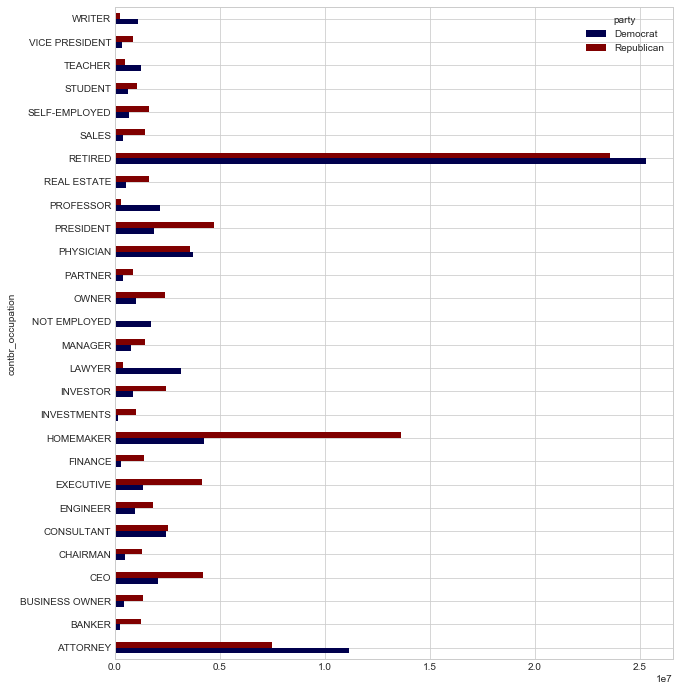

In [37]:
occupation_df = occupation_df[occupation_df.sum(1) > 1000000]
occupation_df.drop(['INFORMATION REQUESTED PER BEST EFFORTS', 'INFORMATION REQUESTED'], axis=0, inplace=True)
occupation_df.loc['CEO'] = occupation_df.loc['CEO'] + occupation_df.loc['C.E.O.']
occupation_df.drop(['C.E.O.'], axis=0, inplace=True)

print(f'There were {occupation_df.shape[0]} occupations that as a group have donated at least $1,000,000 in the 2012 election season.')

occupation_df.plot(kind='barh', figsize=(10,12), cmap='seismic')












